In [82]:
import numpy as np

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [83]:
X, y = make_classification(
    n_features=2,
    n_classes=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

In [84]:
y = y.reshape((-1, 1))

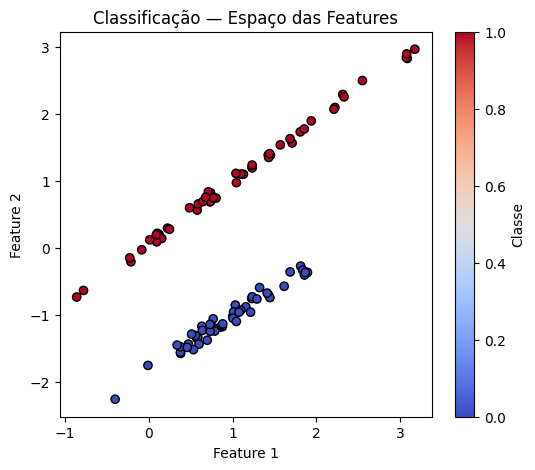

In [85]:
plt.figure(figsize=(6, 5))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap="coolwarm",
    edgecolors="k"
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Classificação — Espaço das Features")
plt.colorbar(label="Classe")
plt.show()

In [86]:
class AdalineSGD:
    def __init__(self, lr, epochs, shuffle):
        self.lr = lr
        self.epochs = epochs
        self.shuffle = shuffle

    def init_params(self, n_in, n_out):
        self.W = np.random.rand(n_in, n_out) * 0.01
        self.b = np.zeros((n_out, 1))
    
    def model(self, X):
        return X @ self.W + self.b
    
    def activation(self, Z):
        return Z
    
    def update_weights(self, xi, yi, y_hat):
        diff = yi - y_hat
        self.W += self.lr * xi * diff
        self.b += self.lr * diff
        
        return diff ** 2
    
    def fit(self, X, y):
        n_in, n_out = X.shape[1], y.shape[1]
        self.init_params(n_in, n_out)
        self.losses = []

        for e in range(self.epochs):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            
            local_loss = []
            for xi, yi in zip(X, y):
                out = self.model(xi)
                Z = self.activation(out)

                xi = xi.reshape(-1, 1)
                yi = yi.reshape(-1, 1)
            
                loss = self.update_weights(xi, yi, Z)
                local_loss.append(loss)

            self.losses.append(np.mean(local_loss))
        
        return self

    
    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def predict(self, X):
        return np.where(self.model(X) >= 0.5, 1, 0)
    

In [87]:
ada_sgd = AdalineSGD(lr=0.01, epochs=1000, shuffle=True).fit(X, y)

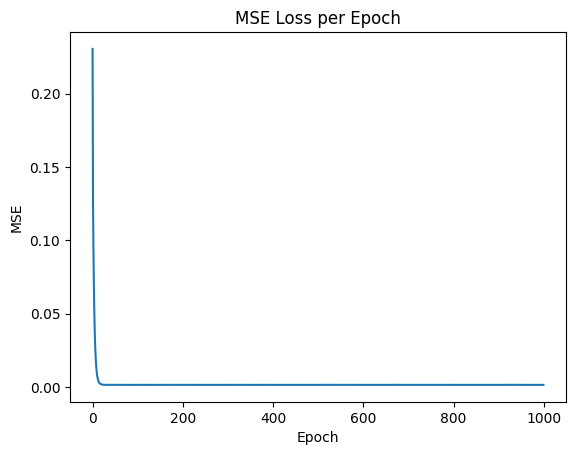

In [88]:
plt.plot(ada_sgd.losses)
plt.title("MSE Loss per Epoch")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.show()

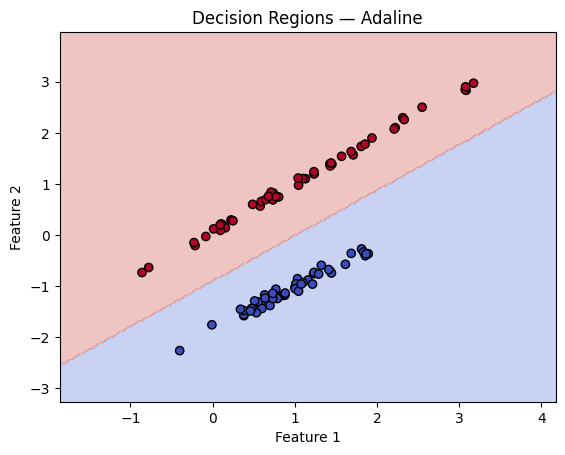

In [89]:
x1 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
x2 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200)

X1, X2 = np.meshgrid(x1, x2)

grid = np.c_[X1.ravel(), X2.ravel()]

Z = ada_sgd.predict(grid)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.3, cmap="coolwarm")

plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap="coolwarm", edgecolors="k")

plt.title("Decision Regions — Adaline")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()